In [1]:
### Libraries loading

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
from numpy.random import normal
from matplotlib.lines import Line2D

In [11]:
def filter(list_):
    new_list = []
    for v in list_:
        if 0<=v<=1:
            new_list.append(v)
    return new_list

normal_dist1 = filter(normal(0.3, 0.1, 3000))
normal_dist2 = filter(normal(0.6, 0.2, 3000))
target = [0 for i in range(len(normal_dist1))] + [1 for i in range(len(normal_dist2))]
predictions = normal_dist1 + normal_dist2

In [27]:
fpr, recall, threshold = roc_curve(target, predictions)
auroc_v = roc_auc_score(target, predictions)

In [28]:
import matplotlib.pyplot as plt

In [14]:
# curr_threshold = 500
# fig = plt.figure(figsize=(6, 10))
# plt.subplot(2,1,1)
# plt.plot(fpr, recall)
# plt.axvline(fpr[curr_threshold])
# plt.plot([i/10 for i in range(11)], [i/10 for i in range(11)], color="red")
# plt.show()

# kwargs = dict(alpha=0.3, density=True, bins=50)
# custom_lines = [Line2D([0], [0], color="red", lw=10),
#                 Line2D([0], [0], color="blue", lw=10)]
# fig = plt.figure(figsize=(6, 10))
# plt.subplot(2,1,2)
# plt.hist(normal_dist1, **kwargs, color="red")
# plt.hist(normal_dist2, **kwargs, color="blue")
# plt.axvline(threshold[curr_threshold])
# plt.legend(custom_lines, ['Class 0', 'Class 1'], prop={'size': 15})
# plt.show()

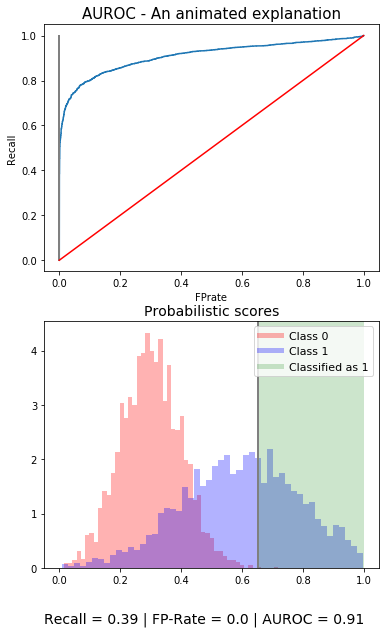

In [67]:
import matplotlib.animation as animation

sampled_threshold = [threshold[i] for i in range(0, len(threshold), 5)][1:]
sampled_fpr = [fpr[i] for i in range(0, len(fpr), 5)][1:]
sampled_tpr = [recall[i] for i in range(0, len(recall), 5)][1:]

def update_auroc(num, lines):
    line1, line2, txt, span = lines
    line1.set_data([sampled_fpr[num], sampled_fpr[num]], [0, 1])
    line2.set_data([sampled_threshold[num], sampled_threshold[num]], [0, 5])
    mt = txt.set_text("Recall = {} | FP-Rate = {} | AUROC = {}".format(round(sampled_tpr[num], 2), 
                                                                       round(sampled_fpr[num], 2),
                                                                       round(auroc_v, 2)))
    xy = span.xy
    thr = sampled_threshold[num]
    xy[2][0] = thr
    xy[3][0] = thr
    span.set_xy(xy)
    return (line1, line2, mt), 

curr_threshold = len(threshold)-100
fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 10))

ax1.set_title("AUROC - An animated explanation", fontsize=15)
ax1.set_xlabel("FPrate")
ax1.set_ylabel("Recall")
ax1.plot(fpr, recall)
# ax1.axvline(fpr[curr_threshold])
l1 , v1 = ax1.plot(0, 0, 1, 1, linewidth=2, color= 'grey')
ax1.plot([i/10 for i in range(11)], [i/10 for i in range(11)], color="red")


kwargs = dict(alpha=0.3, density=True, bins=50)
custom_lines = [Line2D([0], [0], color="red", lw=5, alpha=0.3),
                Line2D([0], [0], color="blue", lw=5, alpha=0.3),
                Line2D([0], [0], color="green", lw=5, alpha=0.2)]
ax2.set_title("Probabilistic scores", fontsize=14)
ax2.hist(normal_dist1, **kwargs, color="red")
ax2.hist(normal_dist2, **kwargs, color="blue")
l2 , v2 = ax2.plot(0, 0, 1, 1, linewidth=2, color= 'grey')
ax2.legend(custom_lines, ['Class 0', 'Class 1', 'Classified as 1'], prop={'size': 11})

time_text = ax2.text(-0.05, -1.0, '', fontsize=14)
span = ax2.axvspan(1, 1, 0, 1, facecolor='green', alpha=0.2)

auroc = animation.FuncAnimation(fig, update_auroc, len(sampled_threshold), fargs=((l1, l2, time_text, span), ))
auroc.save('line_animation.mp4', writer='imagemagick', fps=20);

plt.show()